In [7]:
install.packages("readxl")

Warning message:
"package 'readxl' is in use and will not be installed"

In [8]:
library(readxl)
library(dplyr)
customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))


In [12]:
install.packages("ggplot2")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\ESTsoft\CreatorTemp\Rtmp2DE180\downloaded_packages


In [13]:
library(ggplot2) 

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [18]:
df_cfm_order <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>%
    select(customer_id, reserv_no, visitor_cnt, cancel, order_no, item_id, sales) %>%
arrange(customer_id, reserv_no, item_id)

In [19]:
head(df_cfm_order)

customer_id,reserv_no,visitor_cnt,cancel,order_no,item_id,sales
W1327595,2019061801,2,N,190618107186310010,M0001,48000
W1327595,2019071801,4,N,190718107186310010,M0005,140000
W1327803,2019060301,4,N,190603578341100100,M0005,140000
W1327803,2019091506,2,N,190915137187310010,M0005,70000
W1328432,2019060601,4,N,190606607189610010,M0005,140000
W1328432,2019060601,4,N,190606607189610010,M0010,12000


In [20]:
df_sct_graph <- df_cfm_order %>%
    group_by(customer_id) %>%
    summarise(vst_cnt = sum(visitor_cnt), cust_amt = sum(sales/1000))

head(df_sct_graph)

customer_id,vst_cnt,cust_amt
W1327595,6,188
W1327803,6,210
W1328432,20,246
W1328505,20,287
W1328786,1,10
W1328985,8,178


Warning message:
"Removed 5 rows containing missing values (geom_point)."

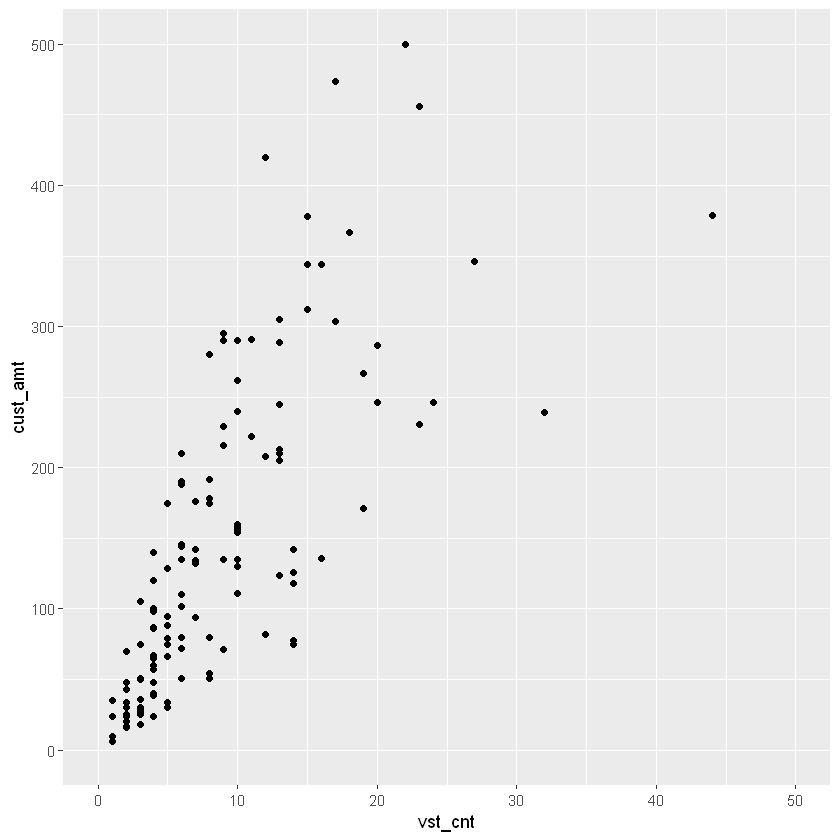

In [23]:
ggplot(data = df_sct_graph, aes(x = vst_cnt, y = cust_amt))+
    geom_point()+
    xlim(0, 50) + ylim(0, 500)

In [24]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [25]:
df_sct_graph2 <- inner_join(df_sct_graph, customer_r, by = "customer_id") %>%
    select(vst_cnt, cust_amt, sex_code)

head(df_sct_graph2)     # 데이터셋 확인

vst_cnt,cust_amt,sex_code
6,188,M
6,210,M
20,246,M
20,287,F
1,10,M
8,178,M


Warning message:
"Removed 5 rows containing missing values (geom_point)."

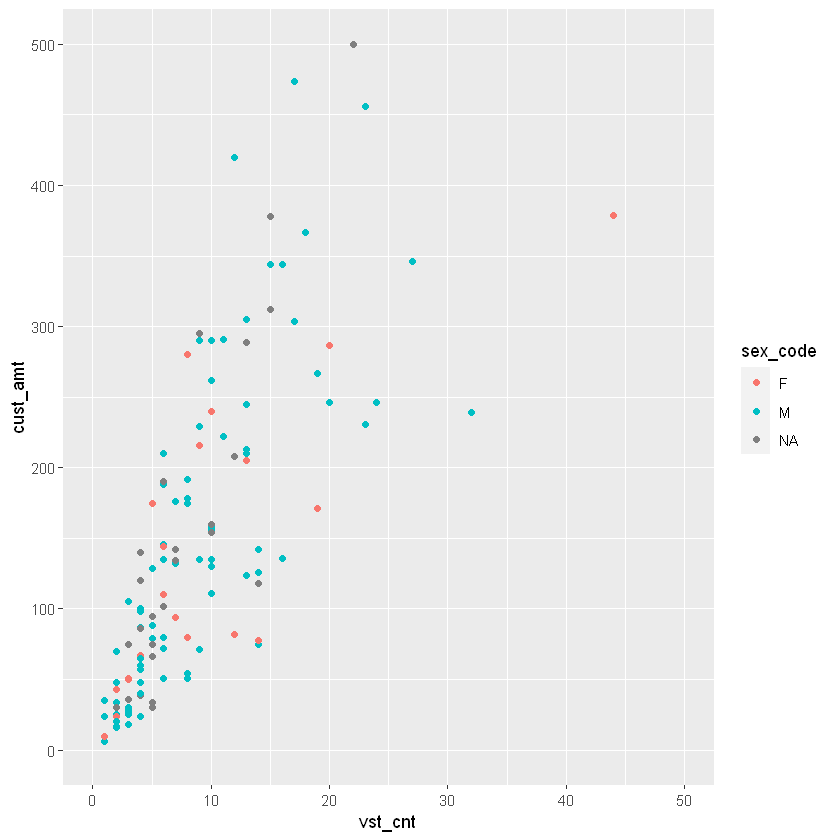

In [26]:
ggplot(data = df_sct_graph2, aes(x = vst_cnt, y = cust_amt, color = sex_code)) +
    geom_point() +
    xlim(0, 50) +
    ylim(0, 500)

In [30]:
df_branch_sales_1  <-  inner_join(reservation_r,order_info_r,by= "reserv_no") %>%
select(branch,sales)%>%
arrange(branch,sales)

df_branch_sales_2 <- df_branch_sales_1%>% group_by(branch)%>%
summarise(amt = sum(sales) / 1000) %>%
arrange(desc)(amt)

df_branch_sales_2

ERROR: Error in UseMethod("arrange"): 클래스 "function"의 객체에 적용된 'arrange'에 사용할수 있는 메소드가 없습니다


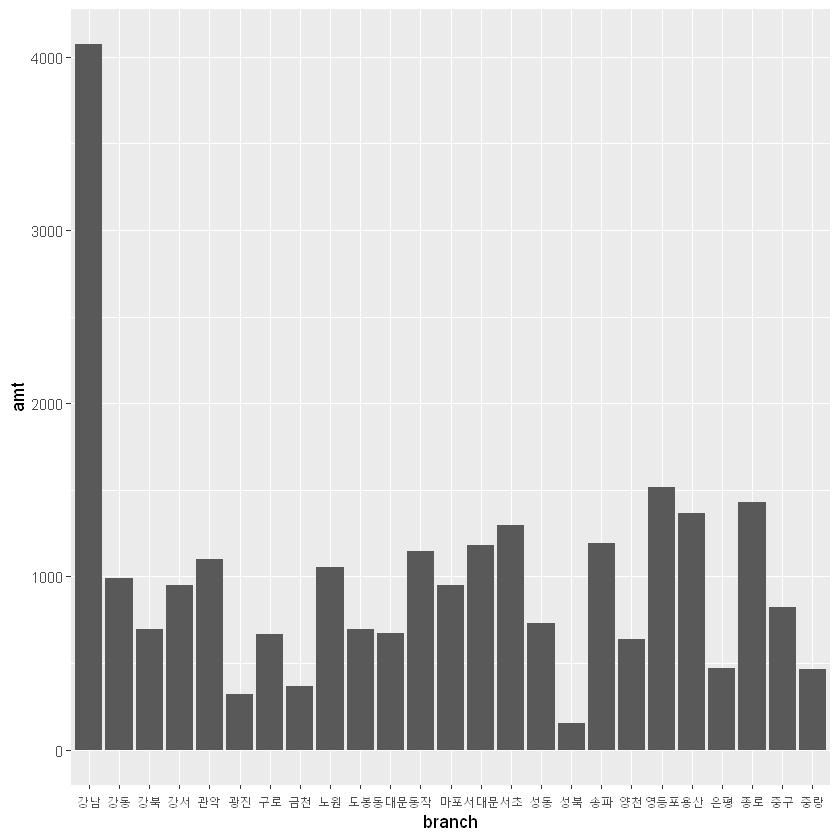

In [31]:
ggplot(df_branch_sales_2, aes(x = branch, y = amt)) + geom_bar(stat = "identity")

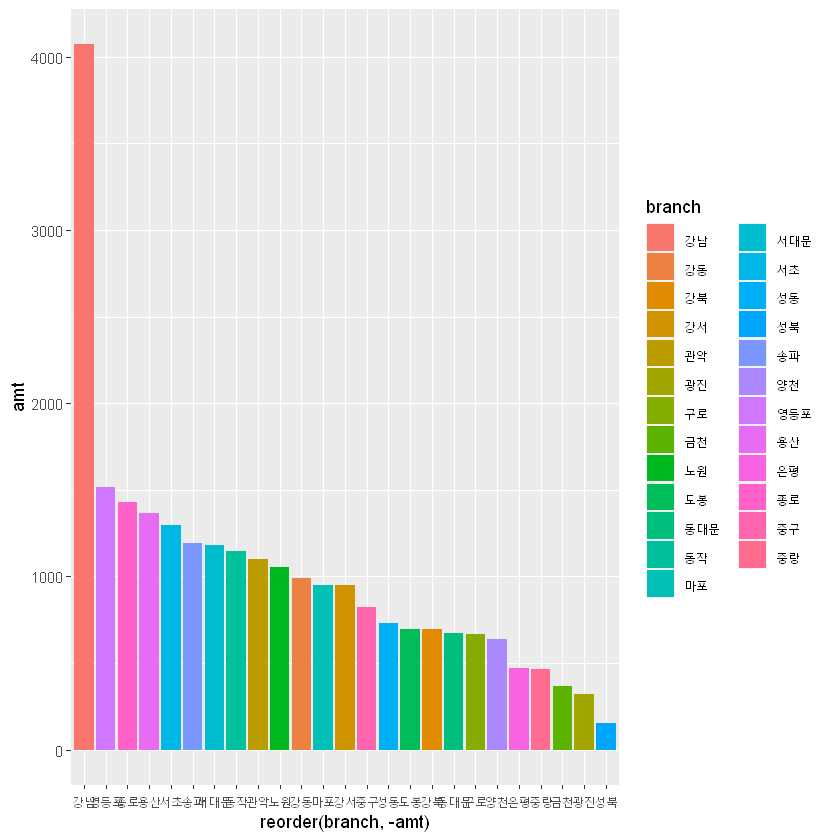

In [32]:
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch)) +
    geom_bar(stat = "identity")

Warning message:
"Removed 19 rows containing missing values (position_stack)."

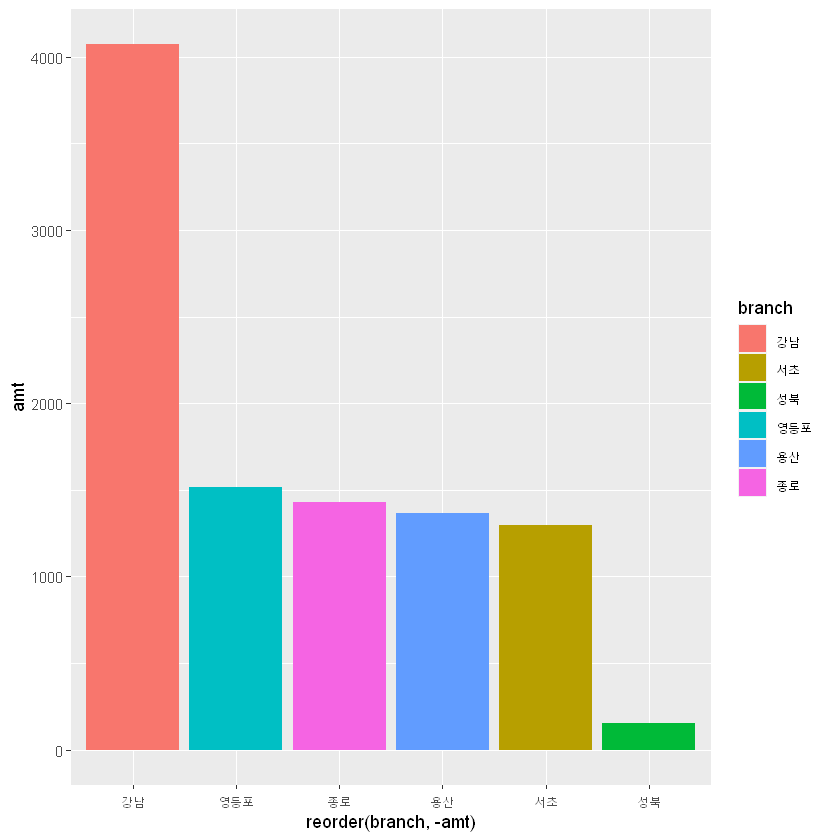

In [33]:
gg <- ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch)) +
    geom_bar(stat = "identity") +
    xlim(c("강남", "영등포", "종로", "용산", "서초", "성북"))
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

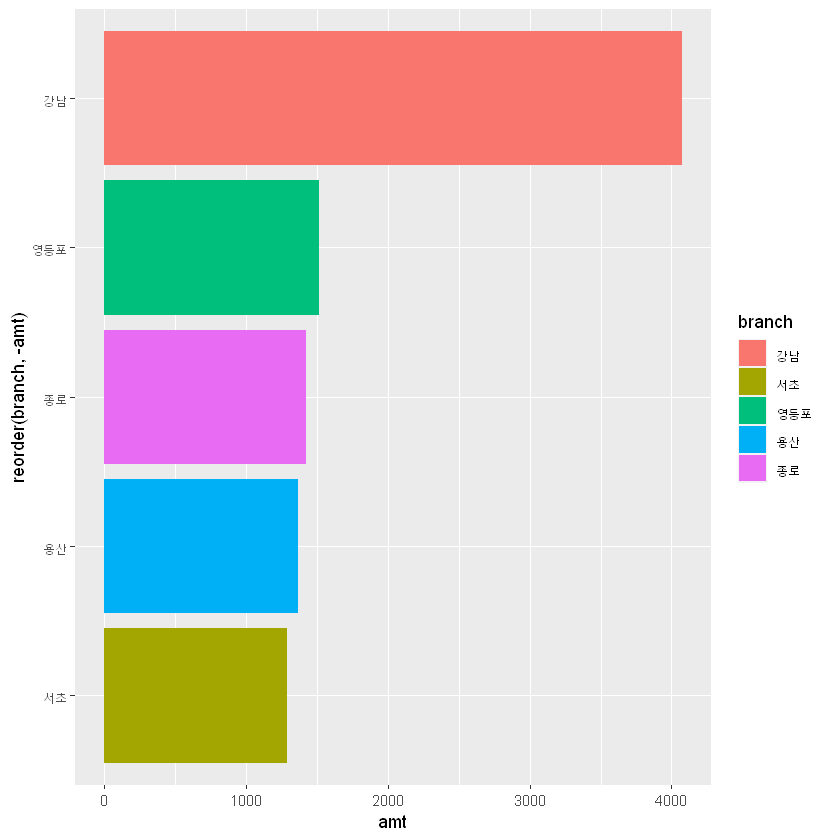

In [37]:
gg <- ggplot(df_branch_sales_2,aes(x= reorder(branch,-amt),y = amt,fill= branch))+ 
geom_bar(stat = "identity")+
xlim(c("서초","용산","종로","영등포","강남"))

gg <-  gg+coord_flip()
gg

Warning message:
"Removed 20 rows containing missing values (position_stack)."

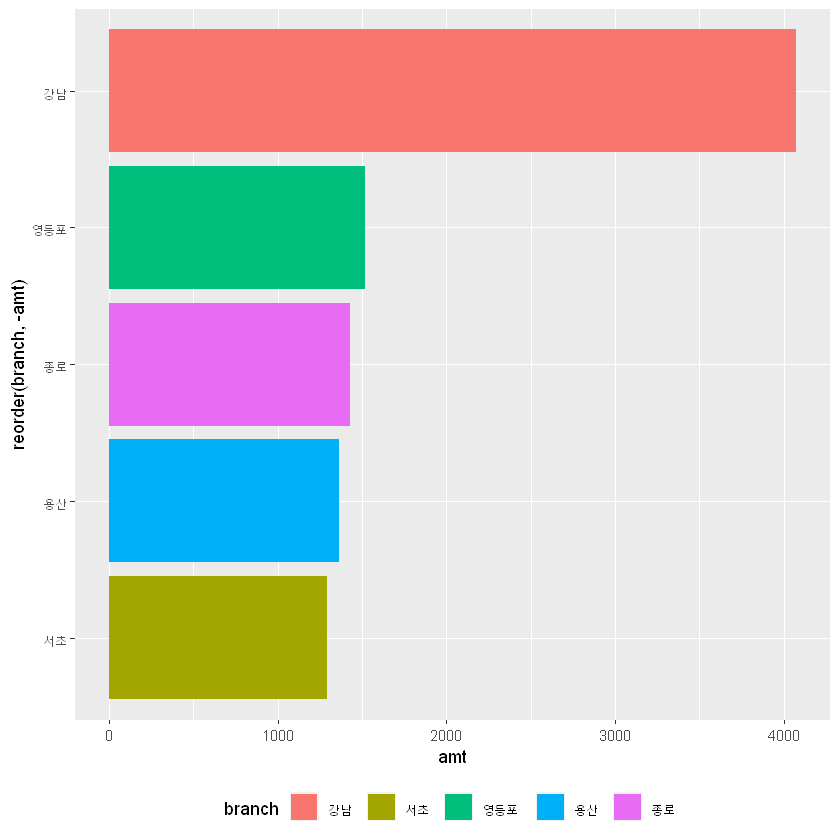

In [38]:
gg <- gg + theme(legend.position = "bottom")
gg

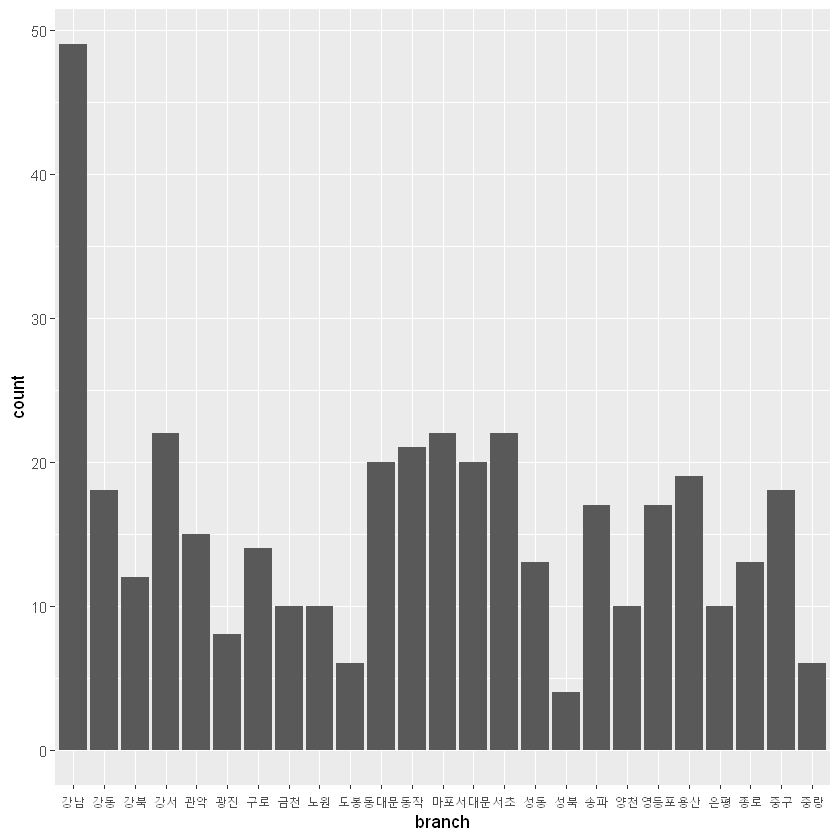

In [39]:
gg <- ggplot(data = reservation_r, aes(x = branch)) + geom_bar(stat = "count")
gg

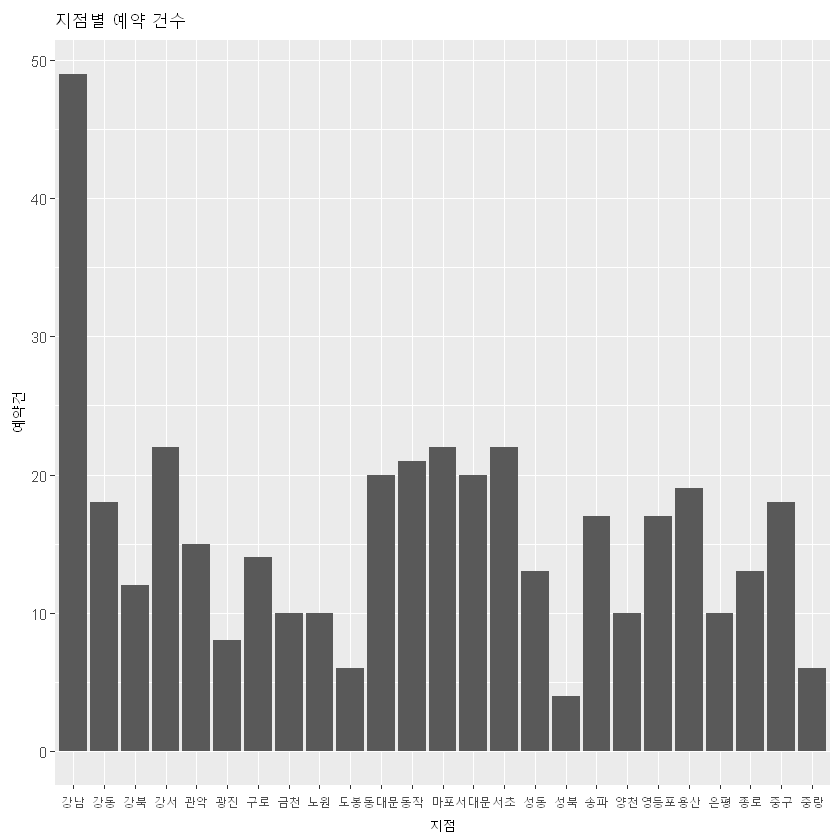

In [41]:
gg <- gg + labs(title = "지점별 예약 건수", x = "지점", y = "예약건")
gg

In [42]:
gg <- gg + theme(axis.title.x = element_text(size = 15,
                                             color = "blue",
                                             face = 'bold',
                                             angle = 0) ,
                 axis.title.y = element_text(size = 13,
                                             color = 'red',
                                             angle = 90)
                )

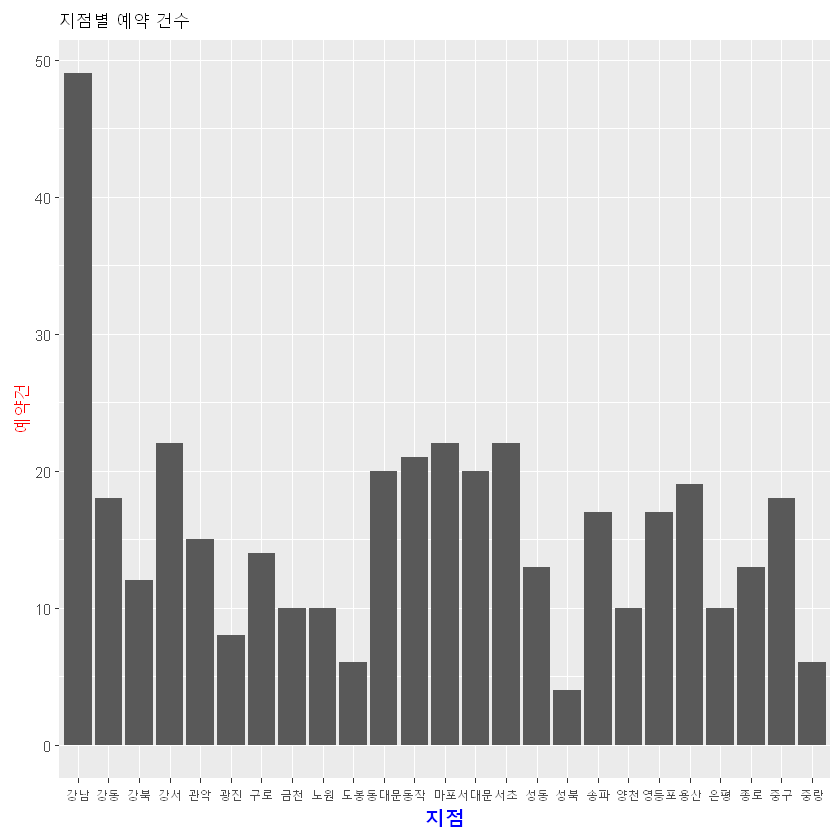

In [43]:
gg

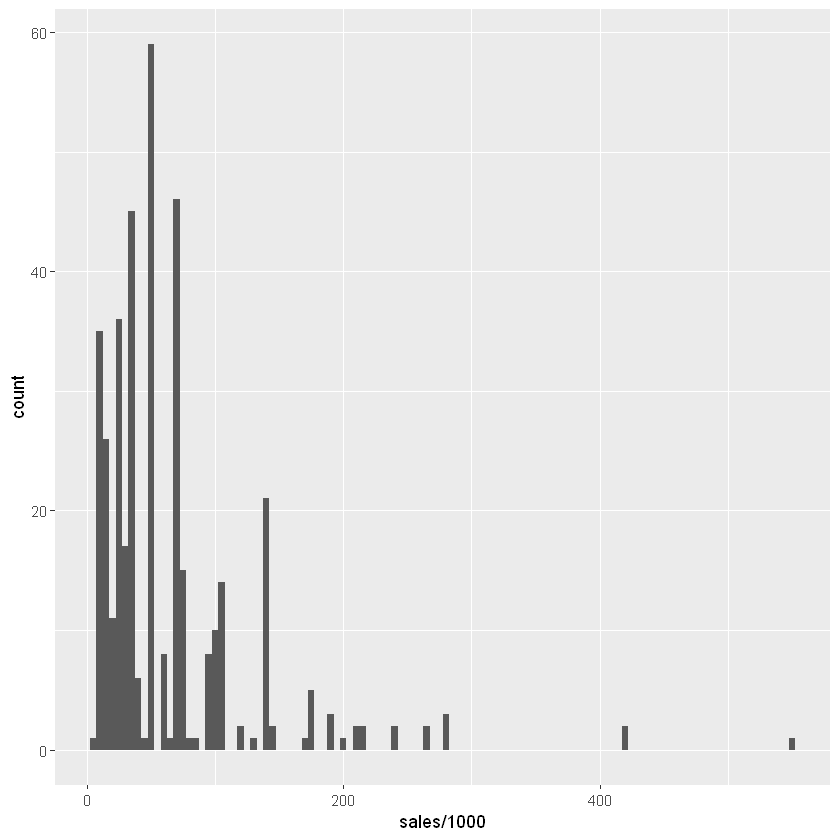

In [44]:
ggplot(data = order_info_r, aes(x = sales/1000)) + geom_histogram(binwidth = 5)

In [45]:
df_pie_graph <- inner_join(order_info_r, item_r, by = "item_id") %>%
    group_by(item_id, product_name) %>%
    summarise(amt_item = sum(sales/1000)) %>%
    select(item_id, amt_item, product_name)

df_pie_graph

`summarise()` has grouped output by 'item_id'. You can override using the `.groups` argument.


item_id,amt_item,product_name
M0001,5808,SPECIAL_SET
M0002,1968,PASTA
M0003,1666,PIZZA
M0004,1625,SEA_FOOD
M0005,9380,STEAK
M0006,2075,SALAD_BAR
M0007,525,SALAD
M0008,610,SANDWICH
M0009,856,WINE
M0010,444,JUICE


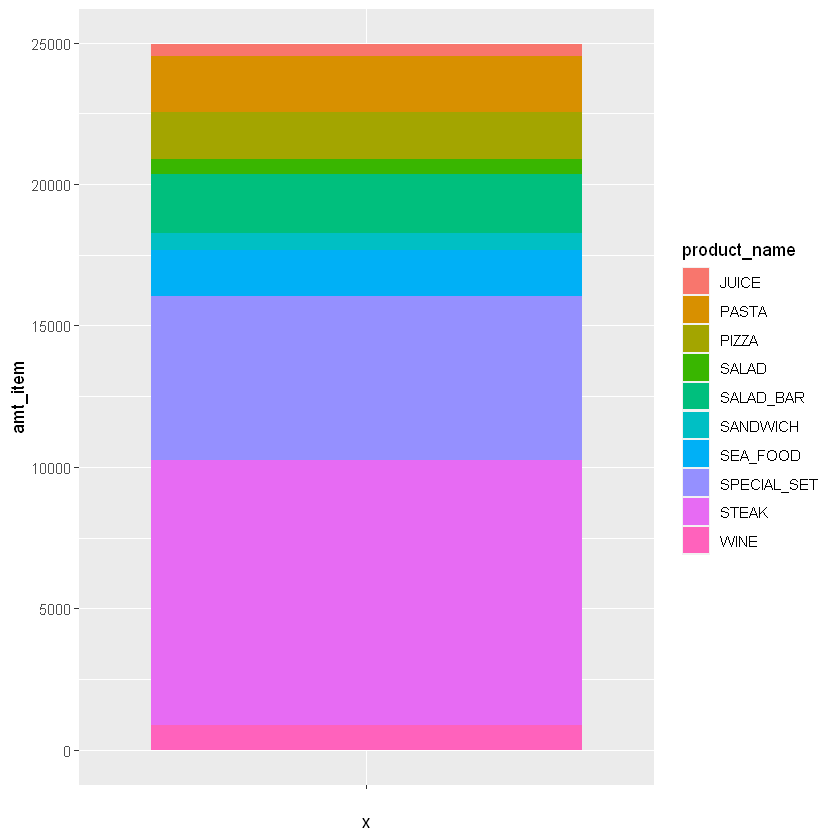

In [48]:
zz<- ggplot(df_pie_graph,aes(x = "",y =amt_item,fill=product_name)) +
geom_bar(stat = "identity")
zz

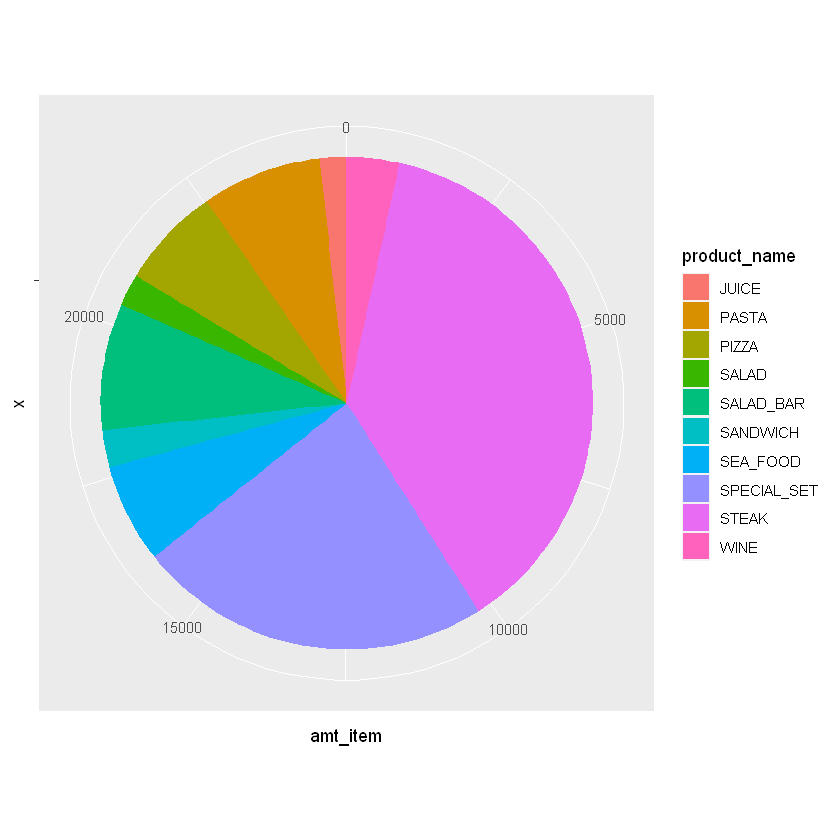

In [50]:
gg <- ggplot(df_pie_graph,aes(x = "",y =amt_item,fill=product_name)) +
geom_bar(stat = "identity") +
coord_polar("y",start = 0)

gg

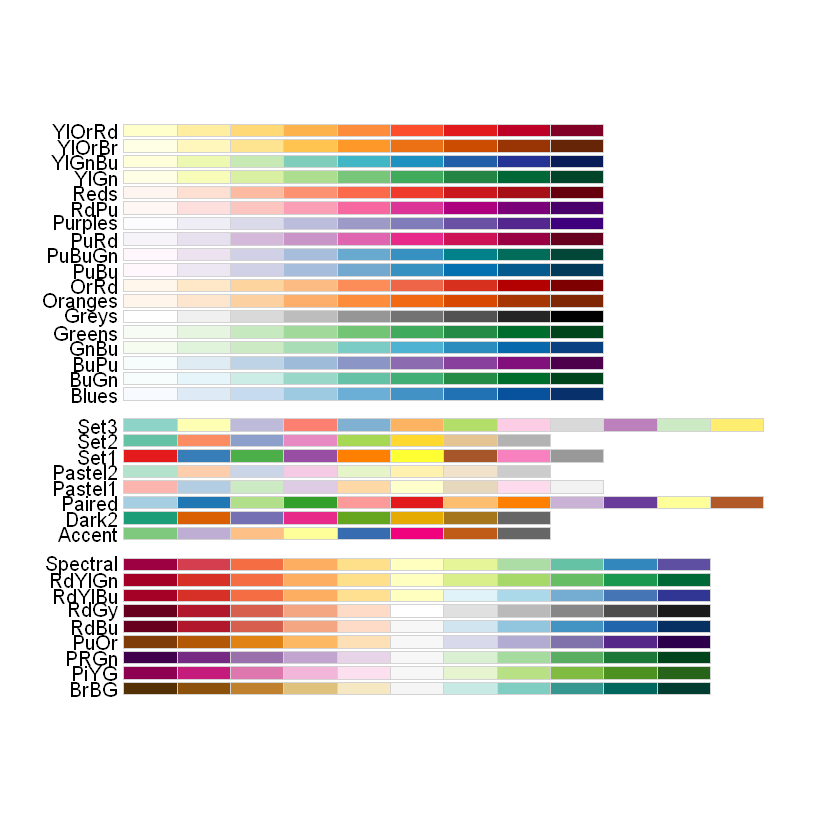

In [51]:
library(RColorBrewer)
display.brewer.all()

Warning message in pal_name(palette, type):
"Unknown palette Apples"Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.
Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Greens is 9
Returning the palette you asked for with that many colors
"

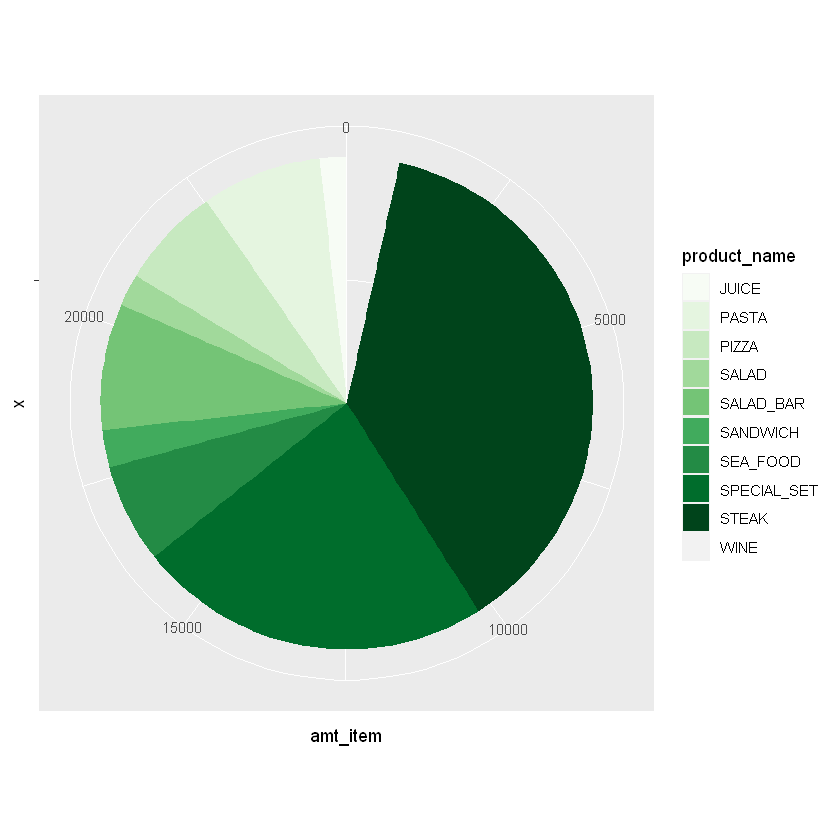

In [53]:
gg <- gg + scale_fill_brewer(palette="Apples")

gg